In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

np.random.seed(42)
n = 500

In [8]:
#Datos sinténticos
MedInc = np.random.lognormal(mean=2.5, sigma=0.35, size=n)
HouseAge = np.random.randint(1,52, size=n)
Longitude = -124 + np.random.rand(n)*10
latitude = 32 + np.random.rand(n)*8
AveRooms = 5 + 0.15 * MedInc + 0.03*HouseAge + np.random.randn(n)

# target
target = (
    0.45*MedInc
    -0.02*HouseAge
    -0.3*(latitude-36)
    -0.01*(Longitude+119)
    +np.random.randn(n)*0.5
)

df = pd.DataFrame(
    {
        "MedInc": MedInc,
        "HouseAge": HouseAge,
        "Longitude": Longitude,
        "latitude": latitude,
        "AveRooms": AveRooms,
        "target": target,
    }
)

numeric_cols = df.columns.tolist()

In [9]:
cov_mat = df[numeric_cols].cov()
corr_mat = df[numeric_cols].corr()
print("Covariance Matrix:\n", cov_mat.round(3))
print("Correlation Matrix:\n", corr_mat.round(3))

Covariance Matrix:
            MedInc  HouseAge  Longitude  latitude  AveRooms  target
MedInc     22.967    -3.196      0.114     0.694     3.275  10.184
HouseAge   -3.196   222.304     -2.162    -0.080     5.950  -5.371
Longitude   0.114    -2.162      8.644     0.390    -0.140  -0.086
latitude    0.694    -0.080      0.390     5.031    -0.049  -1.211
AveRooms    3.275     5.950     -0.140    -0.049     1.587   1.368
target     10.184    -5.371     -0.086    -1.211     1.368   5.303
Correlation Matrix:
            MedInc  HouseAge  Longitude  latitude  AveRooms  target
MedInc      1.000    -0.045      0.008     0.065     0.542   0.923
HouseAge   -0.045     1.000     -0.049    -0.002     0.317  -0.156
Longitude   0.008    -0.049      1.000     0.059    -0.038  -0.013
latitude    0.065    -0.002      0.059     1.000    -0.017  -0.234
AveRooms    0.542     0.317     -0.038    -0.017     1.000   0.472
target      0.923    -0.156     -0.013    -0.234     0.472   1.000


In [10]:
# Hat-Matrix
y = df['target'].values.reshape(-1, 1)
X = df[["MedInc", "AveRooms", "HouseAge", "latitude", "Longitude"]].values

In [11]:
XtX = X.T @ X
XtX_inv = np.linalg.inv(XtX)
beta = XtX_inv @ X.T @ y
print(beta)
y_hat = X @ beta

resid = y - y_hat

#Hat Matrix
H = X @ XtX_inv @ X.T
leverage = np.diag(H)
print(leverage)

[[ 0.45057526]
 [ 0.0100494 ]
 [-0.01820922]
 [-0.26092723]
 [-0.07796257]]
[0.00716159 0.00844413 0.01408987 0.02184983 0.00429377 0.00363699
 0.01170095 0.00409888 0.01298956 0.02004416 0.02000181 0.01125825
 0.00234209 0.0090851  0.00677085 0.00391568 0.00444953 0.00703757
 0.00873464 0.01154218 0.00957694 0.00665284 0.00684896 0.01179716
 0.01327239 0.00303293 0.011155   0.00842512 0.00745521 0.00279771
 0.01261319 0.02021371 0.00631714 0.0155859  0.01159935 0.00613634
 0.00510555 0.018697   0.01324469 0.0034197  0.00562677 0.0087702
 0.00501241 0.00784706 0.00864927 0.00821474 0.0072518  0.01550617
 0.00571816 0.0156292  0.00446867 0.00472426 0.00463717 0.00993394
 0.01440882 0.01969    0.00877429 0.01308522 0.00704663 0.00880683
 0.00397642 0.00699333 0.00844003 0.00768161 0.00457698 0.01278514
 0.0114409  0.0070369  0.01081139 0.01271357 0.00682801 0.01261825
 0.00281993 0.01199783 0.01059717 0.01638579 0.00519933 0.0054284
 0.01443269 0.00695402 0.00905185 0.01234914 0.01897185

In [12]:
print ("H", H.shape)
print ("y", y.shape)
print ("X", X.shape)
print ("beta", beta.shape)


H (500, 500)
y (500, 1)
X (500, 5)
beta (5, 1)


In [13]:
summary = pd.DataFrame({
    "index": np.arange(n),
    "leverage": leverage,
    "y": y_hat.flatten(),
    "resid": resid.flatten(),
})

In [14]:
print("Top Ten Leverage Points")
print(summary.sort_values(by="leverage", ascending=False).head(10).round(3))

Top Ten Leverage Points
     index  leverage       y  resid
209    209     0.116  22.197  0.007
478    478     0.049  15.946  0.416
179    179     0.035  13.824 -0.958
416    416     0.030   9.742 -1.013
362    362     0.029   5.548 -0.688
378    378     0.029  10.970 -0.629
323    323     0.027   9.645 -0.481
113    113     0.025  12.003  0.080
234    234     0.025   9.682 -0.289
247    247     0.025   3.476 -0.011


pt2

In [15]:
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [16]:
# Generate synthetic data
np.random.seed(0)

# Normal house
house_size = np.random.normal(2000, 400, 100)
house_price = 100 + 0.5 * house_size + np.random.normal(0, 20000, 100)

# Add few mansion
house_size = np.append(house_size, [5000, 6000, 7000])
house_price = np.append(house_price, [450000, 550000, 800000])

# Fit a linear regression model
X = sm.add_constant(house_size)
model = sm.OLS(house_price, X).fit()

In [17]:
# Printing model parameter
print("Model with mansions:")
print(f"Intercept: {model.params[0]:.2f}")
print(f"Slope: {model.params[1]:.2f}")

Model with mansions:
Intercept: -225040.03
Slope: 114.59


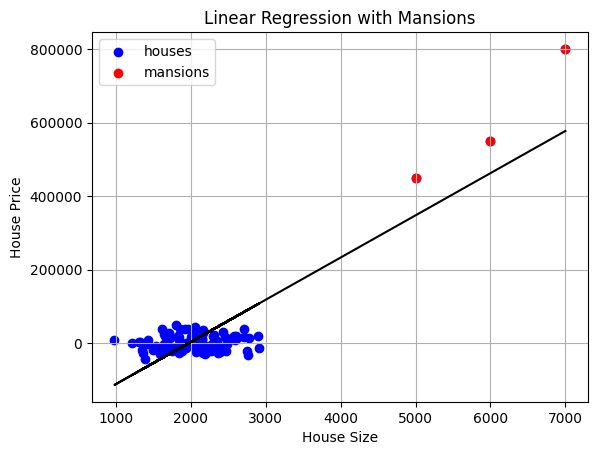

In [18]:
# Plot the data

plt.scatter(house_size, house_price, label='houses', color="blue")
plt.scatter(house_size[-3:], house_price[-3:], label='mansions', color="red")
plt.plot(house_size, model.params[0] + model.params[1]*house_size, color='black')
plt.title('Linear Regression with Mansions')
plt.xlabel('House Size')
plt.ylabel('House Price')
plt.legend()
plt.grid(True)
plt.show()

In [19]:
# Get the leverage points
influence = model.get_influence()
leverage = influence.hat_matrix_diag
residuals = model.resid

# Thereshold
n= len(house_size)
p = X.shape[1]
avg_lev = p/n
thershold = 2*avg_lev
print(thershold)

0.038834951456310676


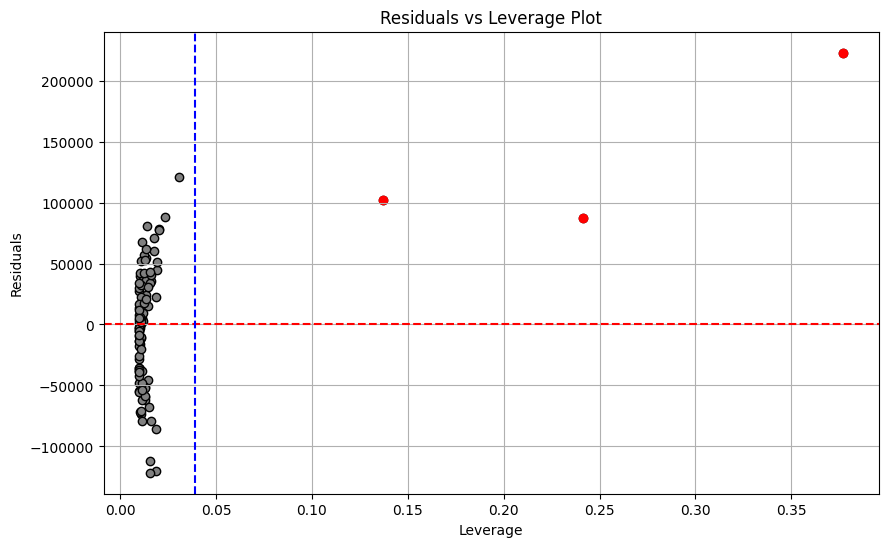

In [20]:
plt.figure(figsize=(10, 6))
plt.scatter(leverage, residuals, edgecolors='k', facecolor='gray')
plt.axhline(0, color='red', linestyle='--')
plt.axvline(thershold, color= 'blue', linestyle='--')
plt.xlabel('Leverage')
plt.ylabel('Residuals')
plt.title('Residuals vs Leverage Plot')
plt.grid(True)

high_leverage_points = np.where(leverage > thershold)[0]
plt.scatter(leverage[high_leverage_points],
            residuals[high_leverage_points],
            color='red',
            label='High Leverage Points')

plt.show()

In [21]:
print(f"High leverage points (index): {high_leverage_points}")
print(f"leverage: {leverage[high_leverage_points]}")

High leverage points (index): [100 101 102]
leverage: [0.13694378 0.24146323 0.37708716]


Dataset boston_housing

In [37]:
from tensorflow.keras.datasets import boston_housing

np.random.seed(42)

# Cargar dataset
(x_train, y_train), (x_test, y_test) = boston_housing.load_data()

# Nombres de columnas originales de Boston Housing
feature_names = [
    'CRIM','ZN','INDUS','CHAS','NOX','RM','AGE',
    'DIS','RAD','TAX','PTRATIO','B','MEDV'
]

df = pd.DataFrame(X_total, columns=feature_names)
df['target'] = y_total

df.head()


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,MEDV,target
0,1.23247,0.0,8.14,0.0,0.538,6.142,91.7,3.9769,4.0,307.0,21.0,396.90,18.72,15.2
1,0.02177,82.5,2.03,0.0,0.415,7.610,15.7,6.2700,2.0,348.0,14.7,395.38,3.11,42.3
2,4.89822,0.0,18.10,0.0,0.631,4.970,100.0,1.3325,24.0,666.0,20.2,375.52,3.26,50.0
3,0.03961,0.0,5.19,0.0,0.515,6.037,34.5,5.9853,5.0,224.0,20.2,396.90,8.01,21.1
4,3.69311,0.0,18.10,0.0,0.713,6.376,88.4,2.5671,24.0,666.0,20.2,391.43,14.65,17.7


In [38]:
X = df.drop('MEDV', axis=1)
y = df['MEDV']

X_const = sm.add_constant(X)

# Linear Regression Model
model = sm.OLS(y, X_const).fit()

In [39]:
# Leverage points
influence = model.get_influence()
leverage = influence.hat_matrix_diag
residuals = model.resid

# Threshold
n = X_const.shape[0]
p = X_const.shape[1]

avg_lev = p / n
threshold = 2 * avg_lev
print(f"Threshold: {threshold}")

Threshold: 0.05533596837944664


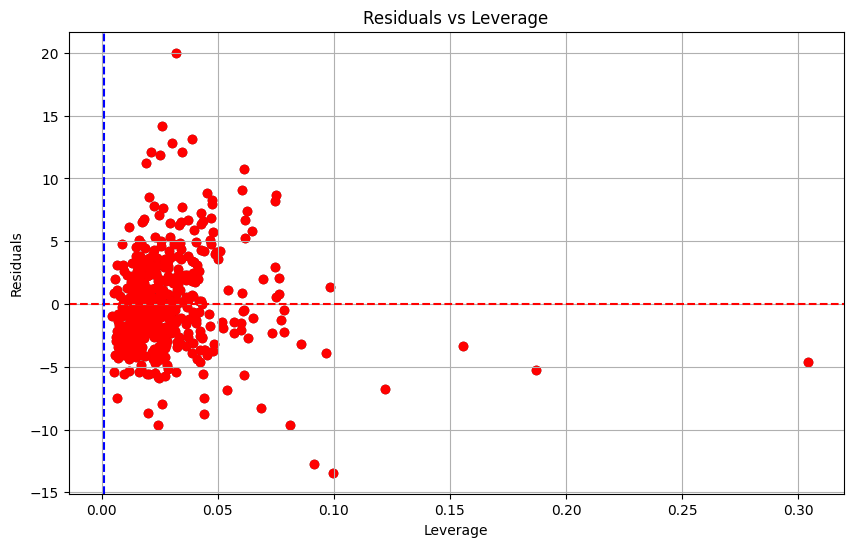

In [60]:
# Asegurar que ambos estén en formato numpy
residuals_vals = residuals.to_numpy()
leverage_vals = leverage
plt.figure(figsize=(10,6))
plt.scatter(leverage_vals, residuals_vals, edgecolors='k', facecolor='gray', alpha=0.7)

plt.axhline(0, color='red', linestyle='--')
plt.axvline(threshold, color='blue', linestyle='--')
plt.xlabel('Leverage')
plt.ylabel('Residuals')
plt.title('Residuals vs Leverage')
plt.grid(True)

# Points with high leverage
high_leverage_points = np.where(leverage_vals > threshold)[0]
plt.scatter(leverage_vals[high_leverage_points], residuals_vals[high_leverage_points], color='red', label='High Leverage Points')
plt.show()


In [41]:
print(f"High Leverage Points: {high_leverage_points}")
print(f"\nLeverage values: {leverage[high_leverage_points]}")

High Leverage Points: [  2  11  14  15  16  40  55  60  79 104 119 124 135 139 158 169 173 229
 236 240 255 270 290 294 301 321 344 349 354 395 412 431 442 472 477 497
 501 503]

Leverage values: [0.12190827 0.06141105 0.06252793 0.18694114 0.07342104 0.07518037
 0.06094475 0.0599776  0.06475985 0.09961034 0.05696517 0.30439371
 0.06117118 0.15580681 0.08113536 0.07637796 0.05714038 0.09164459
 0.06144242 0.06872304 0.06286903 0.08568884 0.07655558 0.06014596
 0.06186861 0.09852477 0.06969563 0.06153176 0.07849474 0.07496141
 0.06050625 0.07734927 0.0786463  0.07444585 0.074653   0.06039381
 0.09651928 0.0652981 ]


Diamonds Dataset

In [42]:
diamonds = sns.load_dataset('diamonds')
diamonds.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [43]:
(diamonds[['x', 'y', 'z']] == 0).sum()

,0
x,8
y,7
z,20


In [45]:
# Filtrar filas donde x, y o z sean cero
(diamonds[['x', 'y', 'z']] == 0).sum()


,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [47]:
diamonds = diamonds[(diamonds[['x','y','z']] != 0).all(axis=1)]
(diamonds[['x', 'y', 'z']] == 0).sum()

,0
x,0
y,0
z,0


In [49]:
# Convert categorical variables to numeric
diamonds_dummies = pd.get_dummies(diamonds_clean, drop_first=True)
diamonds_dummies.isnull().sum()


,0
carat,0
depth,0
table,0
price,0
x,0
y,0
z,0
cut_Premium,0
cut_Very Good,0
cut_Good,0


In [51]:
X = diamonds_dummies.drop('price', axis=1)
y = diamonds_dummies['price']

In [52]:
X_const = sm.add_constant(X)

In [53]:
X_const = X_const.astype(float)
y = y.astype(float)

In [56]:
# Linear regression model
model = sm.OLS(y, X_const).fit()

In [57]:
# Leverage points
influence = model.get_influence()
leverage_vals = influence.hat_matrix_diag

In [58]:
# Threshold
n = X_const.shape[0]
p = X_const.shape[1]

avg_lev = p / n
threshold = 2 * avg_lev
print(f"Threshold: {threshold}")

Threshold: 0.0008902077151335311


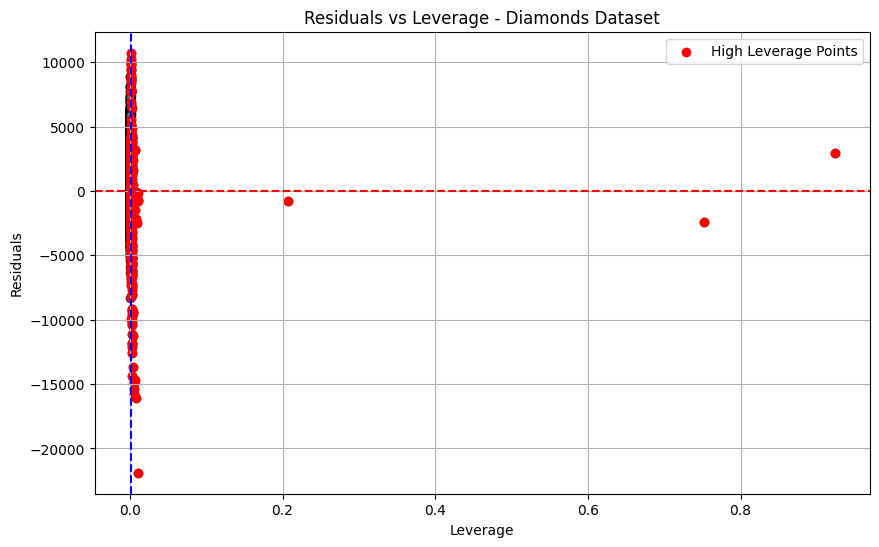

In [59]:
residuals_vals = model.resid.to_numpy()
leverage_vals = leverage_vals
plt.figure(figsize=(10,6))
plt.scatter(leverage_vals, residuals_vals, edgecolors='k', facecolor='gray', alpha=0.7)
plt.axhline(0, color='red', linestyle='--')
plt.axvline(threshold, color='blue', linestyle='--')
plt.xlabel('Leverage')
plt.ylabel('Residuals')
plt.title('Residuals vs Leverage - Diamonds Dataset')
plt.grid(True)

# Points with high leverage
high_leverage_points = np.where(leverage_vals > threshold)[0]
plt.scatter(leverage_vals[high_leverage_points], residuals_vals[high_leverage_points], color='red', label='High Leverage Points')
plt.legend()
plt.show()


In [61]:
print(f"High Leverage Points: {high_leverage_points}")
print(f"\nLeverage values: {leverage[high_leverage_points]}")

High Leverage Points: [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233
 234 235 236 237 238 239 240 